# Curso de Big Data

## Trabajo Practico 3

### Integrantes del grupo: Sebastián Einstoss, Sofía Marinkovic y Pilar Ruiz Orrico

## Parte 1: Análisis de la base de hogares y cálculo de pobreza

In [1]:
#importamos los paquetes a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Importamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



### Ejercicio 1

Algunas variables de la base de hogar que consideramos que serían muy útiles para predecir la pobreza por ingresos y perfeccionar el tp2 serían las relacionadas con las cuestiones estructurales del hogar. Algunos ejemplos son: 

-acceso a agua (IV6)

-tipo de suelo del hogar (IV3)

-si tiene o no baño en el hogar (IV8).

Existe cierta evidencia en la literatura que la pobreza estructural y la pobreza por ingreso tienen cierta correlacion en el largo plazo, por eso la incorporacion.

### Ejercicio 2

In [2]:
#Cargamos la base de datos de HOGARES
data = pd.read_excel("usu_hogar_T121.xlsx")
dfh = data.copy()
#Chequeamos que se vea bien
dfh.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOQUPHMKKUCDEOJAH00701956,2021,1,1,1,44,N,93,77,1,...,NaN,12.0,12.0,0,96,0,98,0,0,0
1,TQRMNOPWXHMOKRCDEGLDF00701361,2021,1,1,1,41,N,15,140,1,...,NaN,6.0,8.0,191,2,0,3,5,6,0


In [3]:
## Seleccionamos solo los datos de CABA y GBA (para HOGARES)
dfh = dfh[(dfh["AGLOMERADO"]==32) | (dfh["AGLOMERADO"]==33)]

#Chequeamos que se vea bien
dfh.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
15,TQRMNOQXUHJMMUCDEIJAH00693031,2021,1,1,1,1,S,33,3255,1,...,3.0,NaN,4.0,5286,2,0,98,0,0,0
21,TQRMNOSRPHLLNRCDEIJAH00651171,2021,1,1,1,1,S,33,2331,1,...,4.0,NaN,5.0,3953,2,0,98,0,0,0
24,TQRMNOPVUHKLMNCDEIIAD00655817,2021,1,1,1,1,S,32,3219,1,...,6.0,NaN,4.0,6435,2,0,98,0,0,0
36,TQRMNORYTHLOPMCDEIJAH00655933,2021,1,1,1,1,S,33,11578,1,...,2.0,NaN,2.0,17494,1,0,8,0,0,0
43,TQRMNOQPVHLMNNCDEIIAD00650542,2021,1,1,1,1,S,32,4300,1,...,12.0,NaN,12.0,0,2,3,98,0,0,0


In [4]:
#Cargamos la base de datos INDIVIDUAL
dfi = pd.read_excel("usu_individual_T121.xlsx")
#Chequeamos que se vea bien
dfi.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHLKLMCDEFIAH00646702,2021,1,1,1,1,43,S,2,675,...,0.0,3.0,40000.0,8.0,8.0,8.0,8.0,0.0,7.0,1377
1,TQRMNOPPRHLKLMCDEFIAH00665104,2021,1,1,1,1,43,S,2,675,...,0.0,2.0,25000.0,6.0,6.0,6.0,6.0,0.0,5.0,723


In [5]:
## Seleccionamos solo los datos de CABA y GBA (base INDIVIDUAL)
dfi = dfi[(dfi["AGLOMERADO"]==32) | (dfi["AGLOMERADO"]==33)]

#Chequeamos que se vea bien
dfi.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
36799,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,0.0,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494
36800,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,0.0,10.0,127500.0,10.0,0.0,10.0,10.0,0.0,10.0,2494
36801,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0
36802,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0
36803,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,0.0,12.0,0.0,12.0,0.0,12.0,12.0,0.0,12.0,0


### Ejercicio 3

In [6]:
#Antes de unir ambas bases chequeamos la longitud de ambas para tener una forma de chequear
ldfh = len(dfh)
ldfi =len(dfi)
print("Longitud base hogares:", len(dfh) ,";Longitud base individual:", len(dfi))


Longitud base hogares: 1474 ;Longitud base individual: 4082


In [7]:
#Juntamos ambas bases

df = dfi.merge(dfh,how='left',on = ['CODUSU', 'NRO_HOGAR'],suffixes=('', '_y'))
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
len(df)




4082

In [8]:
df.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,2,2,0,2,1,2,98,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,2,2,0,2,1,2,98,0,0,0
2,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,1,1,1,S,32,3090,...,2,5,0,5,1,2,98,0,0,0
3,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,S,32,3090,...,2,5,0,5,1,2,98,0,0,0
4,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,S,32,3090,...,2,5,0,5,1,2,98,0,0,0


### Ejercicio 4 

#### Funciones para limpiar la base de datos

Para limpiar la base de datos de observaciones sin sentido vamos a usar la funcion "drop()" de pandas. 
Para ello vamos a ponerle diferentes condiciones, si no las cumple se dropea la fila.

Asimismo para rellenar los missing values usaremos de pandas la funcion "fillna()" y completaremos con lo que consieremos acrode (Por ejemplo la mediana).

Para convertir variables categoricas en dummies usaremos del paquete numpy la funcion "where()".

Por último vamos a eliminar las variables sin sentido para el análisis. Para ello usaremos nuevamente la función "drop()" de pandas. 


### Ejercicio 5 

En este inciso filtramos aquellos valores que no tiene sentido, como por ejemplo: Edades negativas, variables de ingreso que tomen valores negatvos. 

También reemplazamos los valores faltantes por la mediana y dropeamos variablees que no consideramos relevantes. En el código se aclara cuales son.

Finalmente para realizar el analisis convertimos las variables categoricas en dummies.

In [9]:
#Dropeamos edades negativas
df.drop(df[df['CH06']< 0].index, inplace = True)
len(df)
df.head(2)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,S,32,1394,...,2,2,0,2,1,2,98,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,S,32,1394,...,2,2,0,2,1,2,98,0,0,0


In [10]:
#Dropeamos variables ingreso negativas

df.drop(df[ (df['TOT_P12']<0)|(df['ITF']<0)|(df['IPCF']<0) |(df['P47T']<0)|(df['V19_AM']<0)|(df['T_VI']<0) |(df['PP06C']<0) |(df['PP06D']<0)|(df['PP08D1']<0)| (df['PP08D4']<0)| (df['PP08F1']<0)|(df['PP08F2']<0)|(df['PP08J1']<0)|(df['PP08J2']<0)|(df['PP08J3']<0)|(df['P21']<0)|(df['V2_M']<0)|(df['V3_M']<0)|(df['V4_M']<0)|(df['V5_M']<0)|(df['V8_M']<0)|(df['V9_M']<0)|(df['V10_M']<0)|(df['V11_M']<0)|(df['V12_M']<0)|(df['V18_M']<0)|(df['V21_M']<0)].index, inplace = True)


len(df)


3308

In [11]:
#Convertimos alguna variable en dummy (igual que en el TP2)
#Para esto usamos una funcion de numpy

df['MAS_500'] = np.where(df['MAS_500']=='S',1,0)


In [12]:
#Reemplazamos las variables NaN por su mediana

mediana_df = df.median()
df = df.fillna(mediana_df)

#chequeamos
df.head(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V19_B,IX_TOT,IX_MEN10,IX_MAYEQ10,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,1,1,1,1,32,1394,...,2,2,0,2,1,2,98,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,2021,1,1,2,1,1,1,32,1394,...,2,2,0,2,1,2,98,0,0,0
3,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,2,1,1,1,32,3090,...,2,5,0,5,1,2,98,0,0,0
4,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,3,1,1,1,32,3090,...,2,5,0,5,1,2,98,0,0,0
5,TQRMNOPPWHKMNUCDEIIAD00655837,2021,1,1,4,1,1,1,32,3090,...,2,5,0,5,1,2,98,0,0,0


In [13]:
#Convertimos en dummy a variables categoricas
df = pd.get_dummies(data=df, columns =['PP11D_COD','IV1','IV3', 'IV4', 'IV6','IV7','IV9','IV10','IV11','II7', 'II8','II9', 'VII2_1', 'VII2_2', 'VII2_3', 'VII2_4','CH03','CH07','CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02E', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05C_1', 'PP05C_2', 'PP05C_3','PP05H','PP06E', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07J', 'PP07K', 'PP09A', 'PP09C', 'PP10A', 'PP10E', 'PP11A', 'PP11B_COD', 'PP11C', 'PP11C99', 'PP11D_COD', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q'], drop_first=True)

In [14]:
#Dropeamos algunas variables(igual que en el TP2)
df = df.drop(['CH05','PP09A_ESP','PP09C_ESP','IMPUTA'], axis=1).copy()

#Dropeamos variables de la base de hogares
df = df.drop(['IV1_ESP','IV3_ESP','IV7_ESP','II7_ESP', 'II8_ESP'], axis=1).copy()

#Dropeamos las variables de deciles
df= df.drop(['DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR'],axis=1).copy() 

df= df.drop(['DECOCUR', 'IDECOCUR', 'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR'],axis=1).copy()

#Dropeamos las variables que no corresponden a respuestas de las familias
df=df.drop(['ANO4','COMPONENTE', 'H15', 'PONDERA','PONDIIO', 'PONDII', 'TRIMESTRE'], axis=1).copy()
df.head(2)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11O_6.0,PP11O_7.0,PP11O_8.0,PP11O_9.0,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Convertimos en dummy variables que toman solo dos valores (1 y 2 pasan a 1 y 0)
variables = ['IV5', 'IV8', 'IV12_1','IV12_2', 'IV12_3', 'II3', 'II4_1', 'II4_2', 'II4_3', 'II5', 'II6', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'PP02H', 'PP02I', 'PP03C', 'PP05E', 'PP06A', 'PP06H', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP09B', 'PP10C', 'PP10D', 'PP11R', 'PP11S', 'PP11T' ]
for i in variables:
    df[i] = np.where(df[i]==1,1,0)

### Ejercicio 6

##### 5 Variables relevantes de la encuesta de hogares
IV1['4'] = Tipo de vivienda,  pieza en hotel / pensión

IV8 = Baño/letrina

 V5 =  Inresos de subsidio o ayuda social(en dinero)del gobierno, iglesias
 
IV3['3'] = Tipo de suelo, ladrillo suelto / tierra

IV6['2'] = Acceso al agua, fuera de la vivienda pero dentro del
 terreno

In [16]:
#Seleccionamos las variables deseadas
seleccion = df[["IV1_4", 'IV8', 'V5', 'IV3_3', 'IV6_2']]
#armamos tabla descriptiva de las variables seleccionadas
stats = seleccion.describe(include='all')
print (stats)


             IV1_4          IV8           V5        IV3_3        IV6_2
count  3308.000000  3308.000000  3308.000000  3308.000000  3308.000000
mean      0.003023     0.998186     0.189541     0.002116     0.013603
std       0.054907     0.042556     0.391997     0.045959     0.115855
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     1.000000     0.000000     0.000000     0.000000
50%       0.000000     1.000000     0.000000     0.000000     0.000000
75%       0.000000     1.000000     0.000000     0.000000     0.000000
max       1.000000     1.000000     1.000000     1.000000     1.000000


### Ejercicio 7

In [17]:
### Igual que en el TP2
ae = pd.read_excel("tabla_adulto_equiv.xlsx")
ae.head(5)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Edad,Mujeres,Varones,NaN
3,NaN,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35,NaN


In [18]:
#Acomodamos el archivo para poder trabajar
#eliminamos columnas
ae.drop(["Unnamed: 3"], axis = 1,inplace = True)

#chequeamos
ae.head(5)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Edad,Mujeres,Varones
3,NaN,NaN,NaN
4,Menor de 1 año,0.35,0.35


In [19]:
### eliminamos las filas que no sirven
ae.dropna(inplace = True)
#chequeamos
ae.head(5)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
2,Edad,Mujeres,Varones
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51


In [20]:
#Acomodamos los nombres de las columnas
ae.columns = ae.iloc[0]
ae.drop(2,inplace=True)
ae.reset_index()
#chequeamos
ae.head(5)

2,Edad,Mujeres,Varones
4,Menor de 1 año,0.35,0.35
5,1año,0.37,0.37
6,2 años,0.46,0.46
7,3 años,0.51,0.51
8,4 años,0.55,0.55


In [21]:
#Reacomodamos las filas
ae.reset_index()
ae = ae.melt(id_vars='Edad',value_vars=['Mujeres','Varones'],var_name='sexo')
ae.head()

,Edad,sexo,value
0,Menor de 1 año,Mujeres,0.35
1,1año,Mujeres,0.37
2,2 años,Mujeres,0.46
3,3 años,Mujeres,0.51
4,4 años,Mujeres,0.55


In [22]:
#Reordenamos las categorias por comodidad
ae.loc[ae['sexo'] == "Mujeres", 'sexo'] = 2
ae.loc[ae['sexo']== "Varones", 'sexo'] = 1
#Generamos sub-bases de datos con el fin de poder hacer el trabajo de forma ordenada
aem = ae[ae['sexo'] == 2]
aeh = ae[ae['sexo'] == 1].copy()

#reseteamos el indice de la segunda base
aeh.reset_index(inplace = True)


In [23]:
#Generamos un dataset con edades desde el 0 hasta el 110, para ambos sexos
m = pd.DataFrame(columns=["Edad"])
m.loc[:,"Edad"] = np.arange(111)
#agregamos columna para el adulto equivalente
m['adulto_equiv'] = 0

#Replicamos para varones
h=m.copy()


In [24]:
#Generamos una funcion que nos asignara el adulto equivalente por sexo
def clasificador(df_aux):
    if (df_aux['Edad']<=17):
        return aem['value'][df_aux['Edad']]
    if (df_aux['Edad']>=18) and (df_aux['Edad']<=29):
        return aem['value'][18]
    if (df_aux['Edad']>=30) and (df_aux['Edad']<=45):
        return aem['value'][19]
    if (df_aux['Edad']>=46) and (df_aux['Edad']<=60):
        return aem['value'][20]
    if (df_aux['Edad']>=61) and (df_aux['Edad']<=75):
        return aem['value'][21]
    if (df_aux['Edad']>75):
        return aem['value'][22]

In [25]:
#Lo aplicamos a mujeres y renombramos las columnas por comodidad
m['adulto_equiv'] = m.apply(clasificador,axis=1)
m['CH04']= 2
m = m.rename(columns={'Edad':"CH06"})


In [26]:
#Hacemos lo mismo para los hombres
def clasificador_2(df_aux):
    if (df_aux['Edad']<=17):
        return aeh['value'][df_aux['Edad']]
    if (df_aux['Edad']>=18) and (df_aux['Edad']<=29):
        return aeh['value'][18]
    if (df_aux['Edad']>=30) and (df_aux['Edad']<=45):
        return aeh['value'][19]
    if (df_aux['Edad']>=46) and (df_aux['Edad']<=60):
        return aeh['value'][20]
    if (df_aux['Edad']>=61) and (df_aux['Edad']<=75):
        return aeh['value'][21]
    if (df_aux['Edad']>75):
        return aeh['value'][22]

In [27]:
#Lo aplicamos a los varones y renombramos las columnas por comodidad
h['adulto_equiv'] = h.apply(clasificador_2,axis=1)
h['CH04']= 1
h = h.rename(columns={'Edad':"CH06"})

In [28]:
#Concatenamos ambos datasets para realizar un solo merge.
cuadros_a_concatenar =[m,h]
adequi =pd.concat(cuadros_a_concatenar)
adequi.head(10)

,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
5,5,0.60,2
6,6,0.64,2
7,7,0.66,2
8,8,0.68,2
9,9,0.69,2


In [29]:
#Creamos una columna con el adulto equivalente en el dataframe original
df = df.merge(adequi, on = ['CH04','CH06'], how = 'left')

#Para controlar que este bien el merge dropeamos duplicados y seteamos de nuevo el index
df.drop_duplicates(inplace = True)
df.reset_index( drop = True , inplace = True)

df.head(5)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11O_7.0,PP11O_8.0,PP11O_9.0,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,adulto_equiv
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,0,0,0,0,0,0,1.02
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0.76
2,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,53,0,0,0,...,0,0,0,0,0,0,0,0,0,0.76
3,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0.76
4,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,1,19,0,0,0,...,0,0,0,0,0,0,0,0,0,1.02


In [30]:
#Creamos ad_equiv_hogar a partir del groupby
df2 = df.groupby( by = ['CODUSU']).agg({'adulto_equiv':sum})
df2.rename(columns = {'adulto_equiv': 'ad_equiv_hogar'}, inplace = True)
df2.head()


,ad_equiv_hogar
CODUSU,
TQRMNOPPQHJMQLCDEIJAH00702455,1.67
TQRMNOPPQHJNMQCDEIJAH00698190,3.10
TQRMNOPPQHJONQCDEIJAH00693114,1.76
TQRMNOPPQHKMOSCDEIJAH00656008,2.53
TQRMNOPPQHLMPPCDEIJAH00701610,3.92


In [31]:
#Por ultimo agregamos la columna ad_equiv_hogar a df
df = df.merge(df2, on = ['CODUSU'], how = 'left')

#Para controlar que este bien el merge dropeamos duplicados y seteamos de nuevo el index
df.drop_duplicates(inplace = True)
df.reset_index( drop = True , inplace = True)

df.head(5)

,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11O_8.0,PP11O_9.0,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,adulto_equiv,ad_equiv_hogar
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,0,0,0,0,0,1.02,1.78
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,0,0,0,0,0,0.76,1.78
2,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,53,0,0,0,...,0,0,0,0,0,0,0,0,0.76,3.44
3,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,2,22,0,0,0,...,0,0,0,0,0,0,0,0,0.76,3.44
4,TQRMNOPPWHKMNUCDEIIAD00655837,1,1,1,32,1,19,0,0,0,...,0,0,0,0,0,0,0,0,1.02,3.44


### Ejercicio 8

In [32]:
#cantididad de individuos que respondieron
respondieron = df[df["ITF"] > 0]
si = respondieron.shape[0]
print(si)

2474


In [33]:
#Cantididad de individuos que no respondieron
norespondieron = df[ df["ITF"] <= 0]
no = norespondieron.shape[0]
print(no)

821


In [34]:
tot = no/(si+no)
print(tot)

0.24916540212443095


In [35]:
#agregamos columna ingreso_necesario
respondieron["ingreso_necesario"] = 18914 * respondieron["ad_equiv_hogar"]
respondieron.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11O_9.0,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,0,0,0,0,1.02,1.78,33666.92
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,0,0,0,0,0.76,1.78,33666.92
7,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,66,0,0,0,...,0,0,0,0,0,0,0,0.83,2.52,47663.28
8,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,27,2,1,2,...,0,0,1,0,0,1,0,1.02,2.52,47663.28
9,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,2,65,0,0,0,...,0,0,0,0,0,0,0,0.67,2.52,47663.28


### Ejercicio 9

In [36]:
#creamos una columna
respondieron["pobre"] = ""
respondieron.head()

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,0,0,0,1.02,1.78,33666.92,
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,0,0,0,0.76,1.78,33666.92,
7,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,66,0,0,0,...,0,0,0,0,0,0,0.83,2.52,47663.28,
8,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,27,2,1,2,...,0,1,0,0,1,0,1.02,2.52,47663.28,
9,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,2,65,0,0,0,...,0,0,0,0,0,0,0.67,2.52,47663.28,


In [37]:
#Completamos la columna
respondieron['pobre'] = np.where(respondieron['ITF']<respondieron['ingreso_necesario'],1,0)
#chequeamos que funcione
respondieron.head(5)

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CODUSU,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,PP02C1,PP02C2,PP02C3,...,PP11P_1.0,PP11P_2.0,PP11P_9.0,PP11Q_1.0,PP11Q_2.0,PP11Q_9.0,adulto_equiv,ad_equiv_hogar,ingreso_necesario,pobre
0,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,1,29,0,0,0,...,0,0,0,0,0,0,1.02,1.78,33666.92,0
1,TQRMNOPPRHKMLNCDEIIAD00655703,1,1,1,32,2,29,0,0,0,...,0,0,0,0,0,0,0.76,1.78,33666.92,0
7,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,66,0,0,0,...,0,0,0,0,0,0,0.83,2.52,47663.28,0
8,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,1,27,2,1,2,...,0,1,0,0,1,0,1.02,2.52,47663.28,0
9,TQRMNOPPXHLLLNCDEIIAD00690221,1,1,1,32,2,65,0,0,0,...,0,0,0,0,0,0,0.67,2.52,47663.28,0


### Ejercicio 10

In [38]:
#Seleccionamos datos solo de GBA
df1 = respondieron[(respondieron["AGLOMERADO"]==33)]
df1.shape[0]

1868

In [39]:
##Seleccionamos solo un individuo por hogar
df1 = df1.drop_duplicates('CODUSU')
df1.shape[0]

680

In [40]:
##Sumamos hogares por debajo de la linea de pobreza ponderando por PONDIH
hogares_pobres = df1.groupby('pobre')['PONDIH'].sum()
print(hogares_pobres)

pobre
0    2385188
1    1356105
Name: PONDIH, dtype: int64


In [41]:
tasa_pobreza = hogares_pobres[1]/(hogares_pobres[0]+hogares_pobres[1])
print(tasa_pobreza*100)

36.24696060960743


La tasa de pobreza para hogares de GBA del primer trimestre 2021 se ubica en 36,25%. 

Si bien da un resultado similar al que publicó el INDEC (37,1%) nunca nos va a dar exactamente lo mismo dado que no sabemos en que mes fueron tomados los datos de los diferentes hogares y por lo tanto estamos comparando los ingresos contra la canasta básica promedio del trimestre y no con la que le correspondería a cada familia (según el mes de relevamiento de los datos). 

## Parte 2: Construcción de funciones

### Ejercicio 1: función evalua_metodo

In [42]:
def evalua_metodo (modelo, X_train, y_train,X_test, y_test):
    '''
    La función ajusta al modelo con los datos de entre-
    namiento y calcula la matriz de confusión, las curvas ROC
    y los valores de AUC y de accuracy score de cada método.
    '''
    
    
    y = modelo.fit(X_train, y_train)
    y_pred = y.predict(X_test)
    
    '''matriz de confusion'''
    from sklearn.metrics import confusion_matrix
    matriz_confusion = confusion_matrix(y_test, y_pred)
    #print('Confusion Matrix :')
    #print(matriz_confusion)
        
    ''' Accuracy'''
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy:',accuracy)
        
    '''AUC'''
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, y_pred)
    #print('AUC: %.2f' % auc)
        
    '''Curva de ROC'''
    import matplotlib.pyplot as plt
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    #plt.plot(fpr, tpr, color='darkblue', label='Reg_Log')
    #plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.legend()
    #plt.show()
        
    '''ECM'''
    from sklearn.metrics import mean_squared_error
    ecm = mean_squared_error(y_pred, y_test)
    #print ("ecm:", ecm)
    
    return pd.DataFrame({'modelo': [modelo],'accurancy': [accuracy],'auc':[auc],'ecm':[ecm]})
        

### Ejercicio 2: función cross_validation

In [43]:
def cross_validation (modelo, k, X , y):
    '''Se realiza un cross validation para una base de
    datos dividiendo la muestra en k observaciones'''
    
    '''Partimos la base con K-FOLD'''
    import statistics
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=k,shuffle=True,random_state=100)
    
    ecm = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        '''Aplicamos la funcion evalua_metodo'''
        ecm2 = evalua_metodo(modelo,X_train, y_train,X_test, y_test)
        ecm3 = ecm2.iloc[0]['ecm']
        ecm.append(ecm3) 
    ecm4 = statistics.mean(ecm)
    return ecm4

### Ejercicio 3: función evalua_config

In [44]:
def evalua_config(penalty, C, k, X, y):
        
    
    
    '''defino variable para guardar el minimo ecm''' 
    least_ecm = None
    '''defino nuevas variables para guardar los valores optimos de penaty y C'''
    best_penalty= None
    best_C = None
    
    
    for i in penalty:
        if i =='elasticnet':
            for h in C:
                modelo_nuevo = LogisticRegression(penalty = i, C = h,solver='saga',l1_ratio=0.5) 
                
                ecm_mean = cross_validation (modelo_nuevo, k, X, y)
                if least_ecm == None:
                    least_ecm = ecm_mean
                    best_penalty = i
                    best_C = h
                elif ecm_mean < least_ecm:
                    least_ecm = ecm_mean
                    best_penalty = i
                    best_C = h
        else:
            for h in C:
                modelo_nuevo = LogisticRegression(penalty = i, C = h,solver='liblinear') 
               
                ecm_mean = cross_validation (modelo_nuevo, k, X, y)
                if least_ecm == None:
                    least_ecm = ecm_mean
                    best_penalty = i
                    best_C = h
                elif ecm_mean < least_ecm:
                    least_ecm = ecm_mean
                    best_penalty = i
                    best_C = h
    return pd.Series([best_penalty,best_C], index=['best_penalty','best_C'])
            
                

### Ejercicio 4: función evalua_multiples_metodos

In [45]:
def evalua_multiples_metodos (X_train,y_train,X_test,y_test, penalty, C,k):
    #X_train, X_test = train_test_split(X, test_size=0.3,random_state=101)
    #y_train, y_test = train_test_split(y, test_size=0.3,random_state=101)
    resultados_final = pd.DataFrame(columns=['modelo', 'accurancy', 'auc', 'ecm','hiperparametro'])
    for nombre,i in MODELOS.items():
        if nombre == "Regresión logística":
            res_ev_config = evalua_config(penalty,C,k,X_train,y_train)
            best_penalty = res_ev_config['best_penalty']
            best_C = res_ev_config['best_C']
            if best_penalty == 'elasticnet':
                res_modelo = evalua_metodo(LogisticRegression(penalty = best_penalty, C = best_C,solver='saga',l1_ratio=0.5),X_train, y_train, X_test, y_test)
                res_modelo['modelo']=nombre
                res_modelo['hiperparametro']=best_C
                resultados_final=resultados_final.append(res_modelo,ignore_index=True)
            else:
                res_modelo = evalua_metodo(LogisticRegression(penalty = best_penalty, C = best_C,solver='liblinear'),X_train, y_train, X_test, y_test)
                res_modelo['modelo']=nombre
                res_modelo['hiperparametro']=best_C
                resultados_final=resultados_final.append(res_modelo,ignore_index=True)
        else: 
            res_modelo = evalua_metodo(i,X_train, y_train, X_test, y_test)
            res_modelo['modelo']=nombre
            resultados_final=resultados_final.append(res_modelo,ignore_index=True)
        
    return resultados_final

#### Diccionario de modelos

In [46]:
MODELOS = {
    "Regresión logística": LogisticRegression(),
    "Análisis de Discriminante Lineal": LinearDiscriminantAnalysis(n_components=1),
    "3 vecinos cercanos": KNeighborsClassifier(n_neighbors=3),
    "Arbol de decisión": tree.DecisionTreeClassifier(),
    "Support vector machines (SVM)": svm.SVC(kernel='linear'),
    "Bagging": BaggingClassifier(),
    "Random Forests": RandomForestClassifier(),
    "Boosting": GradientBoostingClassifier()    
}


#### valores que pueden tomar "penalty" y "C"

In [47]:
penalty = ['l1', 'l2']
#penalty = ['l1', 'l2', 'elasticnet', 'none']


C = [1/(10**(-5)), 1/(10**(-4)), 1/(10**(-3)), 1/(10**(-2)), 1/(10**(-1)), 1/(10**(0)), 1/(10**(1)), 1/(10**(2)), 1/(10**(3)), 1/(10**(4)), 1/(10**(5))]


## Parte 3: Clasificación y Regularización

### Ejercicio 1

In [48]:
#Limpliamos las base respondieron

respondieron.drop(['CODUSU','REGION','MAS_500','AGLOMERADO','NRO_HOGAR','PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP06A', 'PP06C', 'PP06D','PP06H','P21','TOT_P12', 'P47T', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF',  'IPCF',  'PONDIH', 'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario'],axis=1, inplace = True) 
                 
#chequeamos cantidad de columnas
respondieron.shape[1]

C:\Users\usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


928

In [49]:
#Limpliamos las base norespondieron
norespondieron.drop(['CODUSU','REGION','MAS_500','AGLOMERADO','NRO_HOGAR','PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP06A', 'PP06C', 'PP06D', 'PP06H', 'P21', 'TOT_P12', 'P47T','V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'ITF', 'IPCF','PONDIH', 'adulto_equiv', 'ad_equiv_hogar'],axis=1, inplace = True)

#chequeamos cantidad de columnas
norespondieron.shape[1]

927

In [50]:
#separarmos 'respondieron' en base de entrenamiento y de testeo

respondieron_train, respondieron_test = train_test_split(respondieron, test_size=0.3,random_state=101)


In [51]:
#Definimos a pobre como variable dependiente

y_train = respondieron_train['pobre'].copy()
y_test = respondieron_test['pobre'].copy()

#la base respondieron queda como matriz X
respondieron_train = respondieron_train.drop(['pobre'], axis=1)
respondieron_test = respondieron_test.drop(['pobre'], axis=1)

In [52]:
y = respondieron['pobre'].copy()

In [53]:
#Separamos la base respondieron en la variable independiente (pobre) y la matriz de variables independientes

respondieron = respondieron.drop(['pobre'], axis=1).copy()


### Ejercicio 2

In [54]:
#Corremos la función evalua_multiples_metodos
evalua_multiples_metodos (respondieron_train,y_train,respondieron_test,y_test, penalty, C,10)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

C:\Users\usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\Users\usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: Futur

,accurancy,auc,ecm,hiperparametro,modelo
0,0.794078,0.761558,0.205922,1.0,Regresión logística
1,0.775236,0.745101,0.224764,NaN,Análisis de Discriminante Lineal
2,0.736205,0.684876,0.263795,NaN,3 vecinos cercanos
3,0.788694,0.759534,0.211306,NaN,Arbol de decisión
4,0.810229,0.779627,0.189771,NaN,Support vector machines (SVM)
5,0.835801,0.800676,0.164199,NaN,Bagging
6,0.787349,0.735221,0.212651,NaN,Random Forests
7,0.819650,0.778858,0.180350,NaN,Boosting


### Ejercicio 3

Para elegir el λ por validación cruzada hay que seguir una serie de pasos.

Para un λ dado se realizan los siguientes pasos:

En primer lugar partimos los datos de la base en k partes iguales. Luego, ajustamos el modelo dejando afuera una de las k partes. Computamos el error de predicción para los datos no utilizados. Este procedimiento lo repetimos para todos los k (en cada caso se deja una parte k afuera del ajuste del modelo). Luego, se promedian todos los errores de predicción. 

Este procedimiento lo repetimos para los diferentes valores de λ. 

Por último comparamos los errores de predicción promedio calculados con cada λ y nos quedamos con el λ que genera un menor resultado. Ese será nuestro λ elegido.

##### ¿Por qué se deja afuera una parte de testeo?

Nuestro objetivo es medir el el error de pronóstico fuera de la muestra. Para no separar arbitrariamente la base en etrenamiento y test se utiliza este método que permite separar la muestra en k partes e ir estimando con k-1 partes. Siempre hay una parte k que no se usa en la estimación porque es la que se va a usar luego para medir el error de predicción. De esta forma, se puede ver esto "fuera de los datos de entrenamiento" ya que se dejo una parte por fuera del ajuste de modelo. En concreto se estima todo k veces y en cada estimación se deja afuera una de las partes. 


### Ejercicio 4

Por un lado, si k es chico maximiza los datos para estimar pero es sensible a los valores particulares de la muestra. 

Por el otro lado, si k es grande maximiza los datos para evaluar pero el modelo estimado es menos preciso. 

En el caso particular de k=n el modelo se estima n veces con n-1 datos. 

Como "regla general" se usa un k=5 o k=10


### Ejercicio 5

In [55]:
###DEFINIMOS LOS λ

numeros = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
lam= []

for i in numeros:
    lam_2 = 10**(i)
    lam.append(lam_2)
    
lam_inversa=[]


for i in lam:
    lam_2 = 1/i
    lam_inversa.append(lam_2)
    
lam_inversa

[99999.99999999999,
 10000.0,
 1000.0,
 100.0,
 10.0,
 1.0,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05]

In [56]:
###Corremos la función evalua_config para encontrar los mejores λ para LASSO y Ridge

resultados_lasso = evalua_config(["l1"],lam_inversa,10,respondieron,y)

resultados_ridge = evalua_config(["l2"],lam_inversa,10,respondieron,y)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [57]:
#mostramos en dataframe los resultados de λ para Ridge y LASSO
mejor_lasso = 1/(resultados_lasso["best_C"])
mejor_ridge = 1/(resultados_ridge["best_C"])
mlr = pd.DataFrame({"λ Lasso": [mejor_lasso] , "λ Ridge": [mejor_ridge] })
mlr

,λ Lasso,λ Ridge
0,1.0,1.0


In [58]:
#Armamos base para lugeo armar los BOX-PLOTS para LASSO
tabla_base_lasso = pd.DataFrame(columns=['lamb','num','ecm'])

for i in lam: 
    i_inv = 1/i
    import statistics
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10,shuffle=True,random_state=100)
    ecm=[]
    for h, (train_index, test_index) in enumerate(kf.split(respondieron)):   
        X_train, X_test = respondieron.iloc[train_index], respondieron.iloc[test_index]  
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        '''Aplicamos la funcion evalua_metodo'''
        ecm2 = evalua_metodo(LogisticRegression(penalty ='l1', C = i_inv,solver='liblinear'),X_train, y_train,X_test, y_test)
        ecm3 = ecm2.iloc[0]['ecm']
        base = pd.DataFrame({"lamb": [i],"num":[h] , "ecm": [ecm3]})   
        tabla_base_lasso= tabla_base_lasso.append(base,ignore_index=True)

,lamb,num,ecm
0,0.00001,0,0.193548
1,0.00001,1,0.217742
2,0.00001,2,0.233871
3,0.00001,3,0.217742
4,0.00001,4,0.238866
...,...,...,...
105,100000.00000,5,0.299595
106,100000.00000,6,0.299595
107,100000.00000,7,0.331984
108,100000.00000,8,0.307692


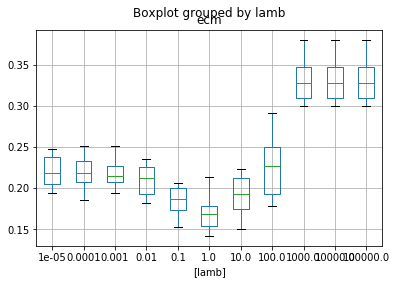

In [59]:
#RESULTADOS y BOX-PLOT PARA lOS λ DE LASSO
tabla_base_lasso.boxplot(by='lamb')

tabla_base_lasso

In [60]:
#Armamos base para lugeo armar los BOX-PLOTS para Ridge

tabla_base_ridge = pd.DataFrame(columns=['lamb','num','ecm'])

for i in lam:
    i_inv=1/i
    import statistics
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10,shuffle=True,random_state=100)
    ecm=[]
    for h, (train_index, test_index) in enumerate(kf.split(respondieron)):   
        X_train, X_test = respondieron.iloc[train_index], respondieron.iloc[test_index]  
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        '''Aplicamos la funcion evalua_metodo'''
        ecm2 = evalua_metodo(LogisticRegression(penalty ='l2', C = i_inv,solver='liblinear'),X_train, y_train,X_test, y_test)
        ecm3 = ecm2.iloc[0]['ecm']
        base = pd.DataFrame({"lamb": [i],"num":[h] , "ecm": [ecm3]})   
        tabla_base_ridge= tabla_base_ridge.append(base,ignore_index=True)

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

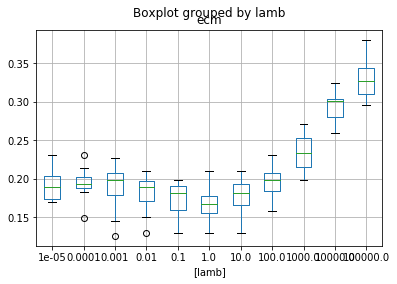

In [61]:
#RESULTADOS y BOX-PLOT PARA lOS λ DE Ridge
tabla_base_ridge.boxplot(by='lamb')

In [62]:
tabla_0_lasso = pd.DataFrame(columns=['lamb','num' ,'ceros'])


for k in lam:
    k_inv = 1/k
    import statistics
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10,shuffle=True,random_state=100)
    ecm=[]
    for h, (train_index, test_index) in enumerate(kf.split(respondieron)):   
        X_train, X_test = respondieron.iloc[train_index], respondieron.iloc[test_index]  ##CHEQUEAR QUE ONDA LO DEL ILOC
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        regresion = LogisticRegression(penalty ='l1', C = k_inv,solver='liblinear').fit(X_train, y_train)
        ceros_1 = np.sum(regresion.coef_ == 0)
        no_ceros = np.sum(regresion.coef_ != 0)
        ceros_final = ceros_1/(ceros_1 + no_ceros)
        base = pd.DataFrame({"lamb": [k] ,"num":[h], "ceros": [ceros_final]})
        tabla_0_lasso= tabla_0_lasso.append(base,ignore_index=True,sort=False)


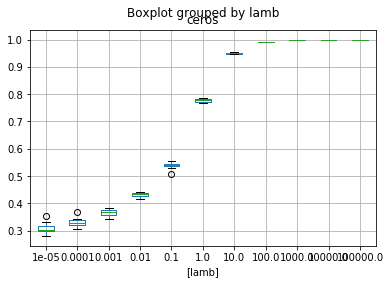

In [63]:
tabla_0_lasso
tabla_0_lasso.boxplot(by='lamb')

### Ejercicio 6

In [64]:
mejor_lasso_inv = 1/mejor_lasso
regresion = LogisticRegression(penalty ='l1', C = mejor_lasso_inv,solver='saga',max_iter=1000).fit(respondieron, y)

df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': regresion.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef == 0]
df_coeficientes[df_coeficientes.coef != 0]

#https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,predictor,coef
1,CH06,-0.009913
3,PP02C2,0.160309
4,PP02C3,0.091431
5,PP02C4,0.045968
6,PP02C5,0.060134
...,...,...
905,PP11L1_1.0,-0.057381
909,PP11M_3.0,-0.038280
911,PP11N_2.0,-0.075218
919,PP11O_8.0,-0.094346


### Ejercicio 7

In [65]:
#medias_lasso = tabla_base_lasso.groupby(['lamb']).mean()
#medias_lasso
#print(medias_lasso[medias_lasso.ecm == medias_lasso.ecm.max()])
#medias_ridge = tabla_base_ridge.groupby(['lamb']).mean()
#medias_ridge
#print(medias_ridge[medias_ridge.ecm == medias_ridge.ecm.max()])

from sklearn.metrics import mean_squared_error

mejor_lasso_inv = 1/mejor_lasso

base_train, base_test = train_test_split(respondieron, test_size=0.3,random_state=101)
base_y_train, base_y_test = train_test_split(y, test_size=0.3,random_state=101)

modelo_mejor_lasso = LogisticRegression(penalty ='l1', C = mejor_lasso_inv,solver='liblinear',max_iter=1000).fit(base_train, base_y_train)
y_pred_mejor_lasso = modelo_mejor_lasso.predict(respondieron_test)
ecm_mejor_lasso =  mean_squared_error(y_pred_mejor_lasso, base_y_test)

mejor_ridge_inv = 1/mejor_ridge

modelo_mejor_ridge = LogisticRegression(penalty ='l2', C = mejor_ridge_inv,solver='liblinear',max_iter=1000).fit(base_train, base_y_train)
y_pred_mejor_ridge = modelo_mejor_ridge.predict(respondieron_test)
ecm_mejor_ridge =  mean_squared_error(y_pred_mejor_ridge, base_y_test)

print('ECM mejor lasso',ecm_mejor_lasso)

print('ECM mejor ridge',ecm_mejor_ridge)


ECM mejor lasso 0.20592193808882908
ECM mejor ridge 0.19515477792732167


Ridge fue mejor método de regularización ya que obtuvo un menor ECM. 

### Ejercicio 8

El método que mejor predijo nuestra variable explicada ("pobre") fue Bagging. Para este modelo no tuvimos que elegir los hiperparámetros con cross validation. En todas las métricas fue el que obtuvo los mejores resultados:

La precisión fue de 0.839838 (máximo valor en comparación con el resto de los métodos).

El área bajo la curva (auc) alcanzó 0.800132, siendo el mayor valor reportado.

Por último, obtuvo el menor ECM, 0.160162.  

### Ejercicio 9

In [66]:
#dropeamos de repondieron "pobre"

#respondieron.drop(['PP06H'],axis=1, inplace = True)

#Computamos el modelo con la base respondieron y predecimos con la base no respondieron
pobre = BaggingClassifier().fit(respondieron, y)
pobre_pred = pobre.predict(norespondieron) 



In [67]:
print(pobre_pred.sum())

316


In [68]:
pobre_pred.shape

(821,)

In [69]:
tasa_pobreza_2 = (pobre_pred.sum())/ pobre_pred.shape
print(tasa_pobreza_2*100)

[38.48964677]


La tasa que predice el modelo se ubica 38,5% contra 36,25% que encontramos en la base respondieron.